<a href="https://colab.research.google.com/github/MarconeRafael/Analise_visual_dados/blob/main/Madrid_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Precisãode preços de casas em Madrid usando aprendizado de máquina

## 1) Ler dataset do arquivo houses_Madrid

In [ ]:
import pandas as pd

dataset = pd.read_csv('./houses_Madrid.csv')
dataset.head()

,Unnamed: 0,id,title,subtitle,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,...,energy_certificate,has_parking,has_private_parking,has_public_parking,is_parking_included_in_price,parking_price,is_orientation_north,is_orientation_west,is_orientation_south,is_orientation_east
0,0,21742,"Piso en venta en calle de Godella, 64","San Cristóbal, Madrid",64.0,60.0,2,1.0,NaN,NaN,...,D,False,NaN,NaN,NaN,NaN,False,True,False,False
1,1,21741,Piso en venta en calle de la del Manojo de Rosas,"Los Ángeles, Madrid",70.0,NaN,3,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21740,"Piso en venta en calle del Talco, 68","San Andrés, Madrid",94.0,54.0,2,2.0,NaN,NaN,...,no indicado,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21739,Piso en venta en calle Pedro Jiménez,"San Andrés, Madrid",64.0,NaN,2,1.0,NaN,NaN,...,en trámite,False,NaN,NaN,NaN,NaN,False,False,True,False
4,4,21738,Piso en venta en carretera de Villaverde a Val...,"Los Rosales, Madrid",108.0,90.0,2,2.0,NaN,NaN,...,en trámite,True,NaN,NaN,True,0.0,True,True,True,True


## 2) Analizar os atributos dos dados

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    21742 non-null  int64  
 1   id                            21742 non-null  int64  
 2   title                         21742 non-null  object 
 3   subtitle                      21742 non-null  object 
 4   sq_mt_built                   21616 non-null  float64
 5   sq_mt_useful                  8228 non-null   float64
 6   n_rooms                       21742 non-null  int64  
 7   n_bathrooms                   21726 non-null  float64
 8   n_floors                      1437 non-null   float64
 9   sq_mt_allotment               1432 non-null   float64
 10  latitude                      0 non-null      float64
 11  longitude                     0 non-null      float64
 12  raw_address                   16277 non-null  object 
 13  i

In [ ]:
dataset.describe()

,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,...,rent_price_by_area,buy_price,buy_price_by_area,built_year,are_pets_allowed,is_furnished,is_kitchen_equipped,has_private_parking,has_public_parking,parking_price
count,21742.000000,21742.000000,21616.000000,8228.000000,21742.000000,21726.000000,1437.000000,1432.000000,0.0,0.0,...,0.0,2.174200e+04,21742.000000,10000.000000,0.0,0.0,0.0,0.0,0.0,7719.000000
mean,10870.500000,10871.500000,146.920892,103.458192,3.005749,2.091687,3.128740,241.692737,NaN,NaN,...,NaN,6.537356e+05,4020.523871,1970.046400,NaN,NaN,NaN,NaN,NaN,2658.000518
std,6276.519112,6276.519112,134.181865,88.259192,1.510497,1.406992,0.907713,247.484853,NaN,NaN,...,NaN,7.820821e+05,1908.418774,69.386705,NaN,NaN,NaN,NaN,NaN,13360.966258
min,0.000000,1.000000,13.000000,1.000000,0.000000,1.000000,1.000000,1.000000,NaN,NaN,...,NaN,3.600000e+04,447.000000,1723.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,5435.250000,5436.250000,70.000000,59.000000,2.000000,1.000000,2.000000,2.000000,NaN,NaN,...,NaN,1.980000e+05,2551.000000,1957.000000,NaN,NaN,NaN,NaN,NaN,0.000000
50%,10870.500000,10871.500000,100.000000,79.000000,3.000000,2.000000,3.000000,232.000000,NaN,NaN,...,NaN,3.750000e+05,3720.000000,1970.000000,NaN,NaN,NaN,NaN,NaN,0.000000
75%,16305.750000,16306.750000,162.000000,113.000000,4.000000,2.000000,4.000000,354.000000,NaN,NaN,...,NaN,7.636000e+05,5000.000000,1994.000000,NaN,NaN,NaN,NaN,NaN,0.000000
max,21741.000000,21742.000000,999.000000,998.000000,24.000000,16.000000,7.000000,997.000000,NaN,NaN,...,NaN,8.800000e+06,18889.000000,8170.000000,NaN,NaN,NaN,NaN,NaN,600000.000000


In [ ]:
dataset.corr()

C:\Users\UFRN.DESKTOP-63F624B\AppData\Local\Temp\ipykernel_2528\2191645083.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Unnamed: 0,id,sq_mt_built,sq_mt_useful,n_rooms,n_bathrooms,n_floors,sq_mt_allotment,latitude,longitude,...,is_buy_price_known,is_renewal_needed,built_year,are_pets_allowed,is_furnished,is_kitchen_equipped,has_parking,has_private_parking,has_public_parking,parking_price
Unnamed: 0,1.000000,-1.000000,0.060701,0.060041,0.023878,0.061791,0.098234,0.189169,NaN,NaN,...,NaN,0.053566,-0.124171,NaN,NaN,NaN,-0.078022,NaN,NaN,0.107096
id,-1.000000,1.000000,-0.060701,-0.060041,-0.023878,-0.061791,-0.098234,-0.189169,NaN,NaN,...,NaN,-0.053566,0.124171,NaN,NaN,NaN,0.078022,NaN,NaN,-0.107096
sq_mt_built,0.060701,-0.060701,1.000000,0.980547,0.715981,0.852856,0.118065,-0.049773,NaN,NaN,...,NaN,0.061207,0.056167,NaN,NaN,NaN,0.391022,NaN,NaN,-0.039611
sq_mt_useful,0.060041,-0.060041,0.980547,1.000000,0.677159,0.799414,0.284724,0.086245,NaN,NaN,...,NaN,0.051603,0.064400,NaN,NaN,NaN,0.332468,NaN,NaN,-0.032651
n_rooms,0.023878,-0.023878,0.715981,0.677159,1.000000,0.729152,0.123464,-0.060678,NaN,NaN,...,NaN,0.171408,0.019483,NaN,NaN,NaN,0.291101,NaN,NaN,-0.014237
n_bathrooms,0.061791,-0.061791,0.852856,0.799414,0.729152,1.000000,0.236889,-0.132613,NaN,NaN,...,NaN,0.000692,0.066458,NaN,NaN,NaN,0.427456,NaN,NaN,-0.037561
n_floors,0.098234,-0.098234,0.118065,0.284724,0.123464,0.236889,1.000000,0.219923,NaN,NaN,...,NaN,-0.170480,0.358472,NaN,NaN,NaN,0.238180,NaN,NaN,NaN
sq_mt_allotment,0.189169,-0.189169,-0.049773,0.086245,-0.060678,-0.132613,0.219923,1.000000,NaN,NaN,...,NaN,0.031791,0.076795,NaN,NaN,NaN,0.038433,NaN,NaN,NaN
latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\UFRN.DESKTOP-63F624B\AppData\Local\Temp\ipykernel_2528\4121679139.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), cmap = 'Reds')


<Axes: >

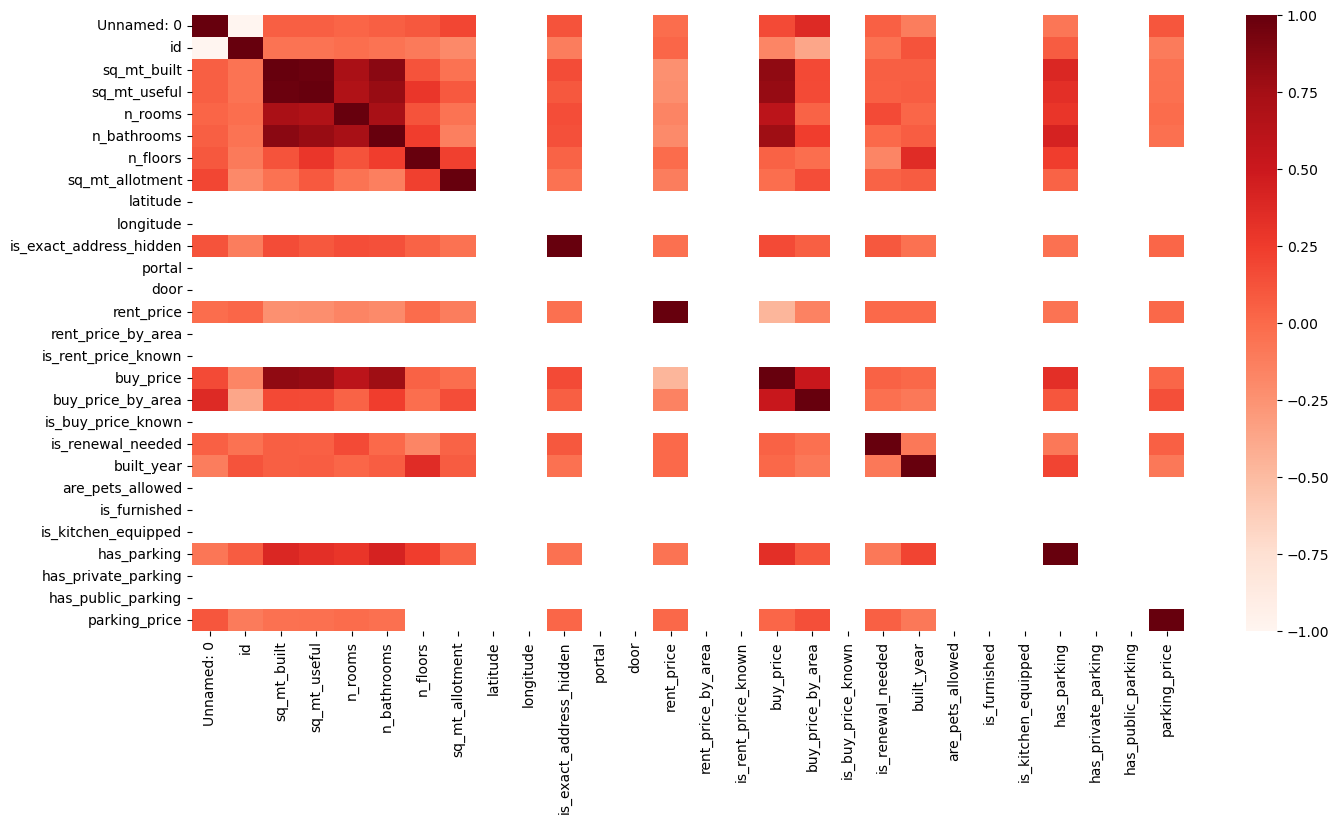

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
sns.heatmap(dataset.corr(), cmap = 'Reds')

In [ ]:
dataset.corr()['buy_price'].sort_values(ascending=False)

C:\Users\UFRN.DESKTOP-63F624B\AppData\Local\Temp\ipykernel_2528\640786938.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()['buy_price'].sort_values(ascending=False)


buy_price                  1.000000
sq_mt_built                0.832039
sq_mt_useful               0.809959
n_bathrooms                0.772218
n_rooms                    0.608893
buy_price_by_area          0.519645
has_parking                0.330515
is_exact_address_hidden    0.166835
Unnamed: 0                 0.165192
n_floors                   0.046492
is_renewal_needed          0.044302
parking_price              0.020581
built_year                 0.008514
sq_mt_allotment           -0.025751
id                        -0.165192
rent_price                -0.468449
latitude                        NaN
longitude                       NaN
portal                          NaN
door                            NaN
rent_price_by_area              NaN
is_rent_price_known             NaN
is_buy_price_known              NaN
are_pets_allowed                NaN
is_furnished                    NaN
is_kitchen_equipped             NaN
has_private_parking             NaN
has_public_parking          

## 3) Realizar limpeza dos dados

In [ ]:
fds = dataset.filter(['buy_price', 'sq_mt_built', 'n_bathrooms', 'n_rooms'])
fds.describe()

,buy_price,sq_mt_built,n_bathrooms,n_rooms
count,2.174200e+04,21616.000000,21726.000000,21742.000000
mean,6.537356e+05,146.920892,2.091687,3.005749
std,7.820821e+05,134.181865,1.406992,1.510497
min,3.600000e+04,13.000000,1.000000,0.000000
25%,1.980000e+05,70.000000,1.000000,2.000000
50%,3.750000e+05,100.000000,2.000000,3.000000
75%,7.636000e+05,162.000000,2.000000,4.000000
max,8.800000e+06,999.000000,16.000000,24.000000


In [ ]:
fds.isnull().sum()

buy_price        0
sq_mt_built    126
n_bathrooms     16
n_rooms          0
dtype: int64

In [ ]:
print(len(fds))

21742


In [ ]:
fds = fds.dropna()
print(len(fds))

21600


In [ ]:
fds.isnull().sum()

buy_price      0
sq_mt_built    0
n_bathrooms    0
n_rooms        0
dtype: int64

In [ ]:
fds.head()

,buy_price,sq_mt_built,n_bathrooms,n_rooms
0,85000,64.0,1.0,2
1,129900,70.0,1.0,3
2,144247,94.0,2.0,2
3,109900,64.0,1.0,2
4,260000,108.0,2.0,2


<Axes: xlabel='buy_price', ylabel='Density'>

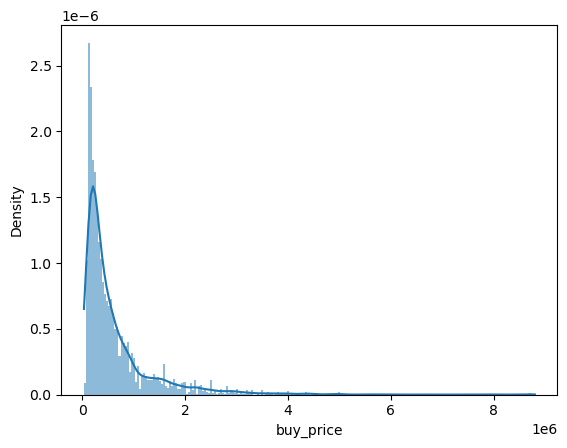

In [ ]:
sns.histplot(fds['buy_price'], kde=True, stat= 'density', linewidth=0)

In [ ]:
min = fds['buy_price'].min()
max = fds['buy_price'].max()
med = fds['buy_price'].median()
avg = fds['buy_price'].mean()
q95 = fds['buy_price'].quantile(0.95)
print("min =", min)
print("max =", max)
print("Mediana =", med)
print("media =", avg)
print("95%=", q95)

min = 36000
max = 8800000
Mediana = 370000.0
media = 636185.817037037
95%= 2150000.0


In [ ]:
fds = fds[fds['buy_price']<2150000.0]
print("Número de amostras após o filtro: ", len(fds))

Número de amostras após o filtro:  20519


<Axes: xlabel='sq_mt_built', ylabel='Density'>

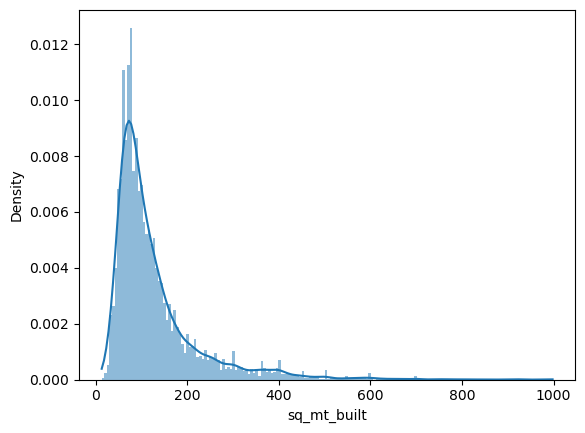

In [ ]:
sns.histplot(fds['sq_mt_built'], kde=True, stat= 'density', linewidth=0)

Número de amostras após o filtro:  20310


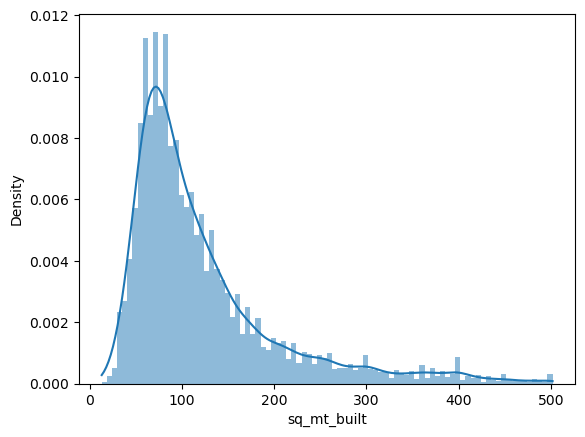

In [ ]:
fds['sq_mt_built'].quantile(0.99)
fds = fds[fds['sq_mt_built']<505.0]
sns.histplot(fds['sq_mt_built'], kde=True, stat= 'density', linewidth=0)
print("Número de amostras após o filtro: ", len(fds))

<Axes: xlabel='n_bathrooms', ylabel='Density'>

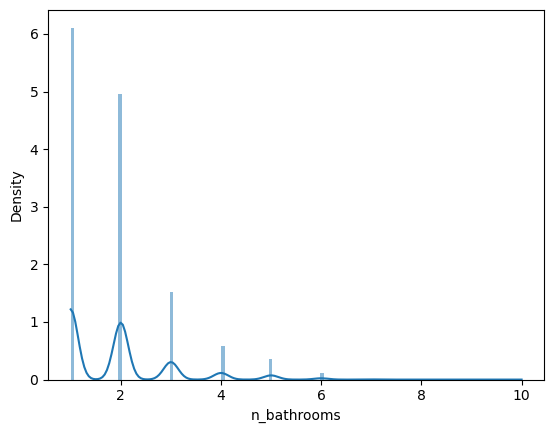

In [ ]:
sns.histplot(fds['n_bathrooms'], kde=True, stat= 'density', linewidth=0)

In [ ]:
fds['n_bathrooms'].quantile(0.99)


5.0

Número de amostras após o filtro:  20110


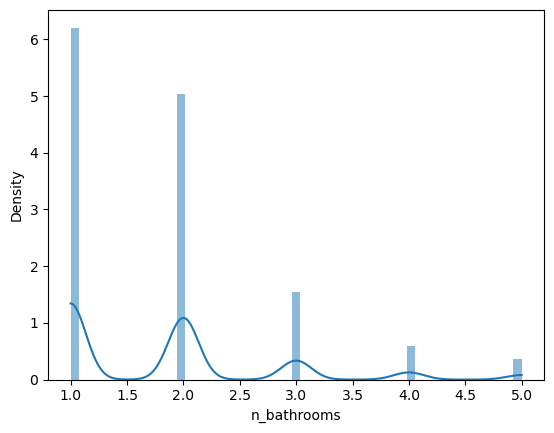

In [ ]:
fds = fds[fds['n_bathrooms']<=5.0]
sns.histplot(fds['n_bathrooms'], kde=True, stat= 'density', linewidth=0)
print("Número de amostras após o filtro: ", len(fds))

<Axes: xlabel='n_rooms', ylabel='Density'>

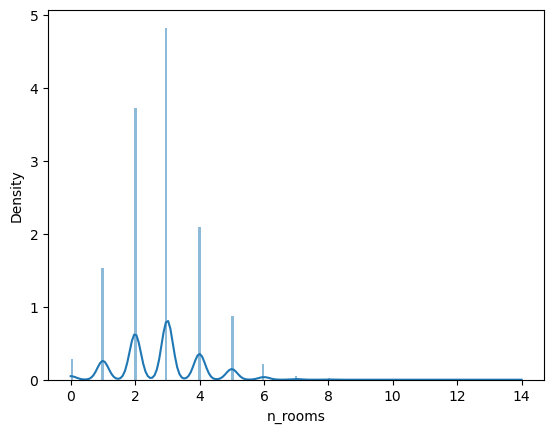

In [ ]:
sns.histplot(fds['n_rooms'], kde=True, stat= 'density', linewidth=0)

In [ ]:
fds['n_rooms'].quantile(0.99)


6.0

Número de amostras após o filtro:  19980


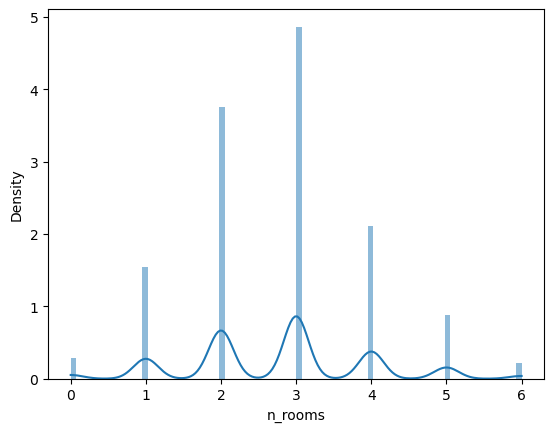

In [ ]:
fds = fds[fds['n_rooms']<=6.0]
sns.histplot(fds['n_rooms'], kde=True, stat= 'density', linewidth=0)
print("Número de amostras após o filtro: ", len(fds))

In [ ]:
fds.describe()

,buy_price,sq_mt_built,n_bathrooms,n_rooms
count,1.998000e+04,19980.000000,19980.000000,19980.000000
mean,4.822739e+05,119.166717,1.817367,2.764164
std,4.076050e+05,77.724203,0.964004,1.190515
min,3.600000e+04,13.000000,1.000000,0.000000
25%,1.890000e+05,69.000000,1.000000,2.000000
50%,3.390000e+05,95.000000,2.000000,3.000000
75%,6.300000e+05,141.250000,2.000000,3.000000
max,2.145000e+06,502.000000,5.000000,6.000000


<Axes: >

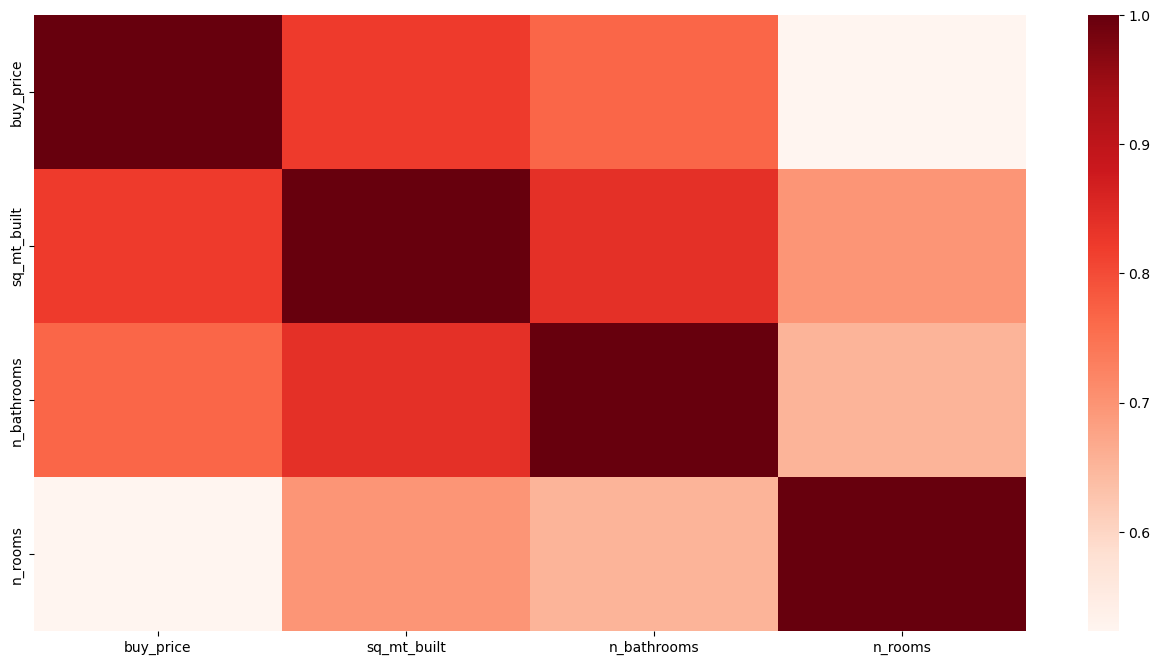

In [ ]:
plt.figure(figsize = (16, 8))
sns.heatmap(fds.corr(), cmap = 'Reds')

In [ ]:
fds.corr()

,buy_price,sq_mt_built,n_bathrooms,n_rooms
buy_price,1.000000,0.822032,0.766545,0.522993
sq_mt_built,0.822032,1.000000,0.837975,0.697580
n_bathrooms,0.766545,0.837975,1.000000,0.652290
n_rooms,0.522993,0.697580,0.652290,1.000000


## 4) Preparar dados para treinamento e teste

In [ ]:
X=  fds.drop(['buy_price'], axis =1)
Y=  fds['buy_price']
print(X.describe())
print(Y.describe())

        sq_mt_built   n_bathrooms       n_rooms
count  19980.000000  19980.000000  19980.000000
mean     119.166717      1.817367      2.764164
std       77.724203      0.964004      1.190515
min       13.000000      1.000000      0.000000
25%       69.000000      1.000000      2.000000
50%       95.000000      2.000000      3.000000
75%      141.250000      2.000000      3.000000
max      502.000000      5.000000      6.000000
count    1.998000e+04
mean     4.822739e+05
std      4.076050e+05
min      3.600000e+04
25%      1.890000e+05
50%      3.390000e+05
75%      6.300000e+05
max      2.145000e+06
Name: buy_price, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
X_train_ps, X_test_ps, Y_train, Y_test = train_test_split(X, Y, test_size =0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_ps)


StandardScaler()

In [ ]:
X_train = scaler.transform(X_train_ps)
X_test = scaler.transform(X_test_ps)

In [ ]:
print(' --X_train_ps.mean -- \n', X_train_ps.mean())
print(' --X_train.mean     -- \n', X_train.mean())

 --X_train_ps.mean -- 
 sq_mt_built    119.296859
n_bathrooms      1.815753
n_rooms          2.762387
dtype: float64
 --X_train.mean     -- 
 -6.223472410311188e-18


## 5) Treinar os modelos de ML

In [ ]:
from sklearn.linear_model import LinearRegression
m = LinearRegression()
m.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_hat = m.predict(X_test)

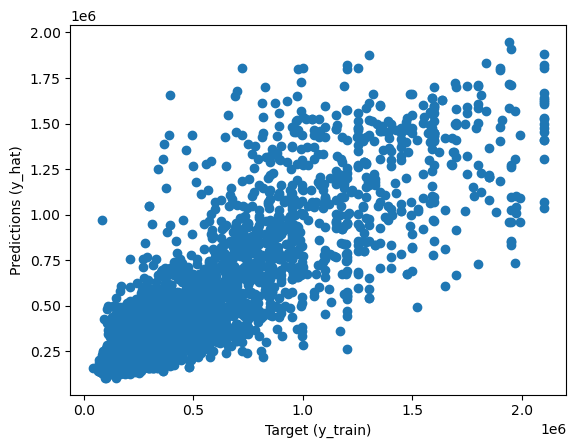

In [ ]:
plt.scatter(Y_test, y_hat)
plt.xlabel('Target (y_train)')
plt.ylabel('Predictions (y_hat)')
plt.show()

In [ ]:
print("price = ", m.predict(scaler.transform([[100, 2, 3]])))

price =  [339000.]


C:\Users\UFRN.DESKTOP-63F624B\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn import metrics
import numpy as np

print("Mean absolute erro: ", metrics.mean_absolute_error(y_hat, Y_test))
print("Mean Squared erro: ", metrics.mean_squared_error(y_hat, Y_test))
print("Root Mean absolute erro: ", np.sqrt(metrics.mean_absolute_error(y_hat, Y_test)))
print("R-squared score: ", metrics.r2_score(y_hat, Y_test))

Mean absolute erro:  147163.09650113134
Mean Squared erro:  48739586848.40806
Root Mean absolute erro:  383.61842565384075
R-squared score:  0.5757875646101116


===  LinearRegression()  ===


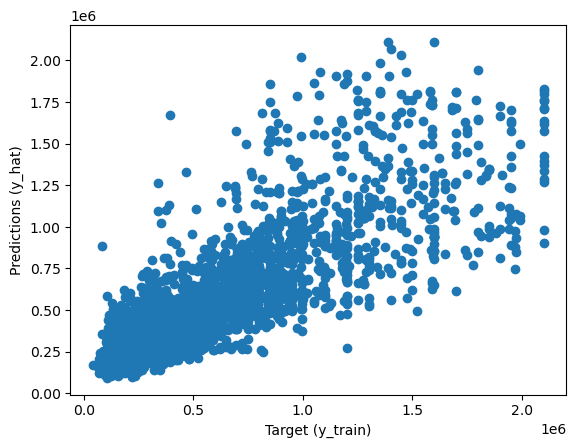

Mean absolute erro:  147163.09650113134
Mean Squared erro:  48739586848.40806
Root Mean absolute erro:  383.61842565384075
R-squared score:  0.5757875646101116
===  RandomForestRegressor()  ===


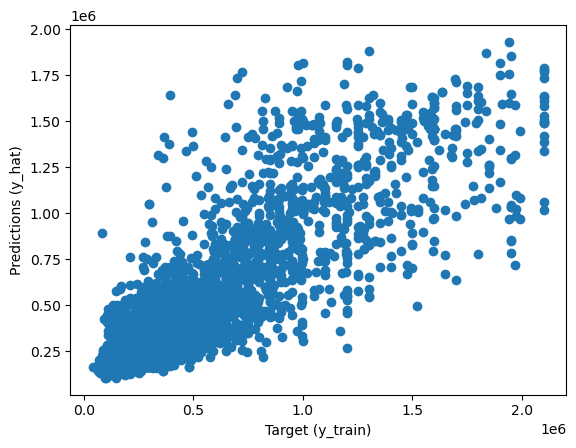

Mean absolute erro:  135521.58568904325
Mean Squared erro:  43689017535.477585
Root Mean absolute erro:  368.1325653742728
R-squared score:  0.668892431413192
===  DummyRegressor(strategy='median')  ===


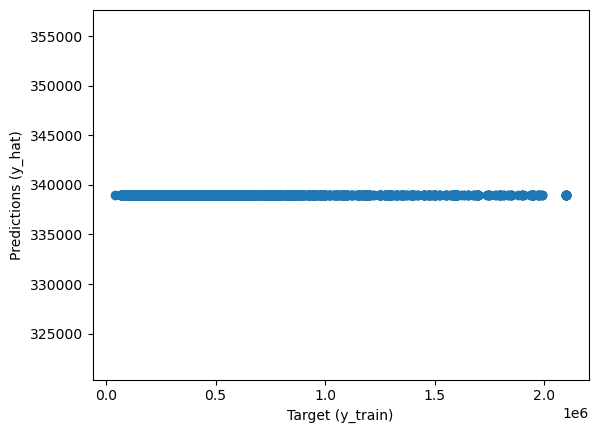

Mean absolute erro:  283628.81906906905
Mean Squared erro:  184082278015.244
Root Mean absolute erro:  532.568135611838
R-squared score:  0.0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#from catboost import CatBoostRegressor
#from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor
from sklearn import metrics
import numpy as np
model_list = [LinearRegression(),
              RandomForestRegressor(),
              DummyRegressor(strategy ="median"),
              #CatBoostRegressor(verbose=False),
              #LGBMRegressor()
             ]

for m in model_list:
    print("=== ", m, " ===")
    m.fit(X_train, Y_train)
    y_hat = m.predict(X_test)
    plt.scatter(Y_test, y_hat)
    plt.xlabel('Target (y_train)')
    plt.ylabel('Predictions (y_hat)')
    plt.show()
    print("Mean absolute erro: ", metrics.mean_absolute_error(y_hat, Y_test))
    print("Mean Squared erro: ", metrics.mean_squared_error(y_hat, Y_test))
    print("Root Mean absolute erro: ", np.sqrt(metrics.mean_absolute_error(y_hat, Y_test)))
    print("R-squared score: ", metrics.r2_score(y_hat, Y_test))